In [ ]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.0.5
astunparse                   1.6.3
certifi                      2024.8.30
charset-normalizer           3.4.0
click                        8.1.7
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
executing                    0.8.3
filelock                     3.16.1
flatbuffers                  24.3.25
fonttools                    4.55.0
fsspec                       2024.10.0
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.68.0
h5py                         3.12.1
huggingface-hub              0.26.3
idna                         3.10
ipykernel                    6.29.5
ipython                      8.27.0
jedi                         0

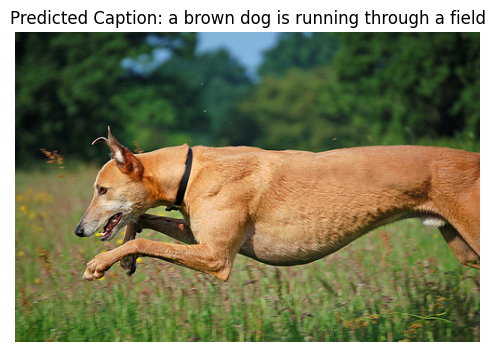

Image Path: 2558312618_13d362df66.jpg
Predicted Caption: a brown dog is running through a field
BLEU-1: 1.0000, BLEU-2: 0.9726, BLEU-3: 0.9444, BLEU-4: 0.9136




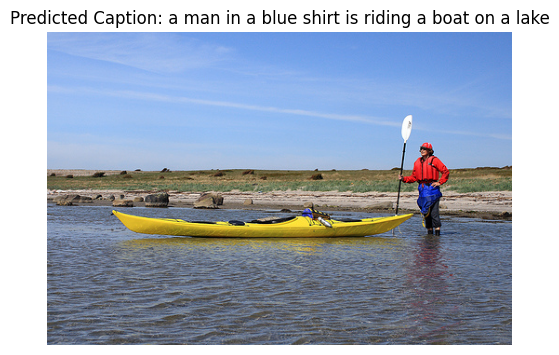

Image Path: 2465218087_fca77998c6.jpg
Predicted Caption: a man in a blue shirt is riding a boat on a lake
BLEU-1: 1.0000, BLEU-2: 0.8992, BLEU-3: 0.7623, BLEU-4: 0.6287




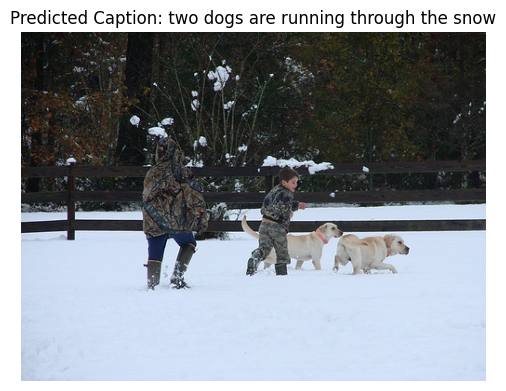

Image Path: 3120189281_1938460e85.jpg
Predicted Caption: two dogs are running through the snow
BLEU-1: 0.9470, BLEU-2: 0.9601, BLEU-3: 0.9460, BLEU-4: 0.9232




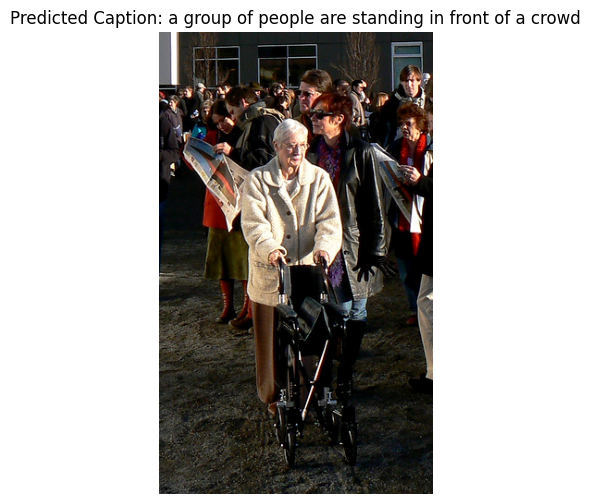

Image Path: 365584746_681f33fa46.jpg
Predicted Caption: a group of people are standing in front of a crowd
BLEU-1: 0.8600, BLEU-2: 0.6755, BLEU-3: 0.5140, BLEU-4: 0.3880




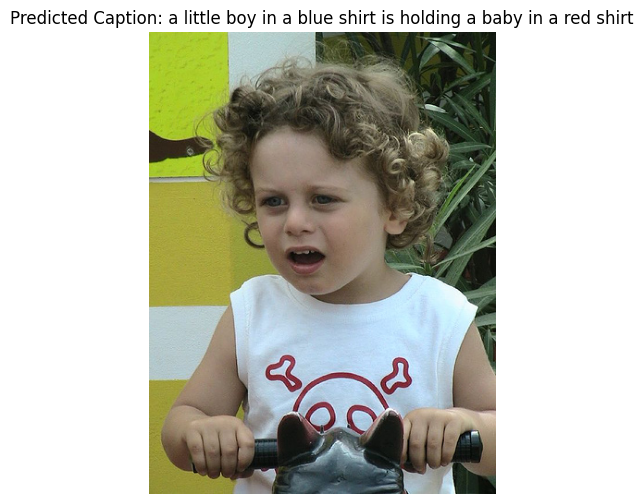

Image Path: 1539166395_0cdc0accee.jpg
Predicted Caption: a little boy in a blue shirt is holding a baby in a red shirt
BLEU-1: 0.9672, BLEU-2: 0.8888, BLEU-3: 0.7787, BLEU-4: 0.6896




In [ ]:
import pickle
import random
import matplotlib.pyplot as plt
from PIL import Image
from nltk.translate.bleu_score import corpus_bleu
import nltk

# Load the generated captions from the saved pickle file
def load_captions_from_file(filename):
    with open(filename, 'rb') as f:
        captions_dict = pickle.load(f)
    #print(f"Captions loaded from {filename}")
    return captions_dict

# Example: Load the file
predicted_captions = load_captions_from_file('test_data_predictions.pkl') # Adjust the path if needed
test_dict = load_captions_from_file('test_data.pkl')

# Normalize paths by replacing '\\' with '/'
predicted_captions_normalized = {key.replace("\\", "/"): value for key, value in predicted_captions.items()}

# Normalize the paths in test_data as well (replace '\\' with '/')
test_data_normalized = {key.replace("\\", "/"): value for key, value in test_dict.items()}

# Function to extract image ID from file path

# Example function to calculate BLEU scores for a random set of 5 images
def calculate_bleu_for_random_images(test_data, predicted_captions_normalized, num_images=5):
    random_images = random.sample(list(test_data.items()), num_images)

    bleu_scores = []

    for image_path, actual_captions in random_images:
        # Get predicted caption for the current image (from normalized dictionary)
        predicted_caption = predicted_captions_normalized.get(image_path, None)

        if predicted_caption:
            # Preprocess actual captions to remove <start> and <end> tokens
            processed_actual = [caption.replace("<start> ", "").replace(" <end>", "") for caption in actual_captions]

            # Calculate BLEU score (for BLEU-1, BLEU-2, BLEU-3, BLEU-4)
            b1 = corpus_bleu([processed_actual], [predicted_caption], weights=(1.0, 0, 0, 0))
            b2 = corpus_bleu([processed_actual], [predicted_caption], weights=(0.5, 0.5, 0, 0))
            b3 = corpus_bleu([processed_actual], [predicted_caption], weights=(0.33, 0.33, 0.33, 0))
            b4 = corpus_bleu([processed_actual], [predicted_caption], weights=(0.25, 0.25, 0.25, 0.25))

            bleu_scores.append({
                "image_path": image_path,
                "predicted_caption": predicted_caption,
                "BLEU-1": b1,
                "BLEU-2": b2,
                "BLEU-3": b3,
                "BLEU-4": b4
            })

    return bleu_scores

# Calculate BLEU scores for 5 random images
bleu_scores = calculate_bleu_for_random_images(test_data_normalized, predicted_captions_normalized, num_images=5)

# Debugging: check if BLEU scores are calculated correctly
'''print("\nCalculated BLEU scores:")
for score in bleu_scores:
    print(score)'''
# Function to extract image ID from file path (just the last part of the path)
def get_image_id(image_path):
    return os.path.basename(image_path)

# Display the images, predicted captions, and BLEU scores with Image ID instead of the full path
for score in bleu_scores:
    # Extract image ID
    image_id = get_image_id(score['image_path'])
    try:
        img = Image.open(score['image_path'])
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Predicted Caption: {score['predicted_caption']}")
        plt.show()
    except Exception as e:
        print(f"Error loading image {score['image_path']}: {e}")

    # Print BLEU scores
    print(f"Image Path: {image_id}")
    print(f"Predicted Caption: {score['predicted_caption']}")
    print(f"BLEU-1: {score['BLEU-1']:.4f}, BLEU-2: {score['BLEU-2']:.4f}, BLEU-3: {score['BLEU-3']:.4f}, BLEU-4: {score['BLEU-4']:.4f}")
    print("\n" + "="*50 + "\n")


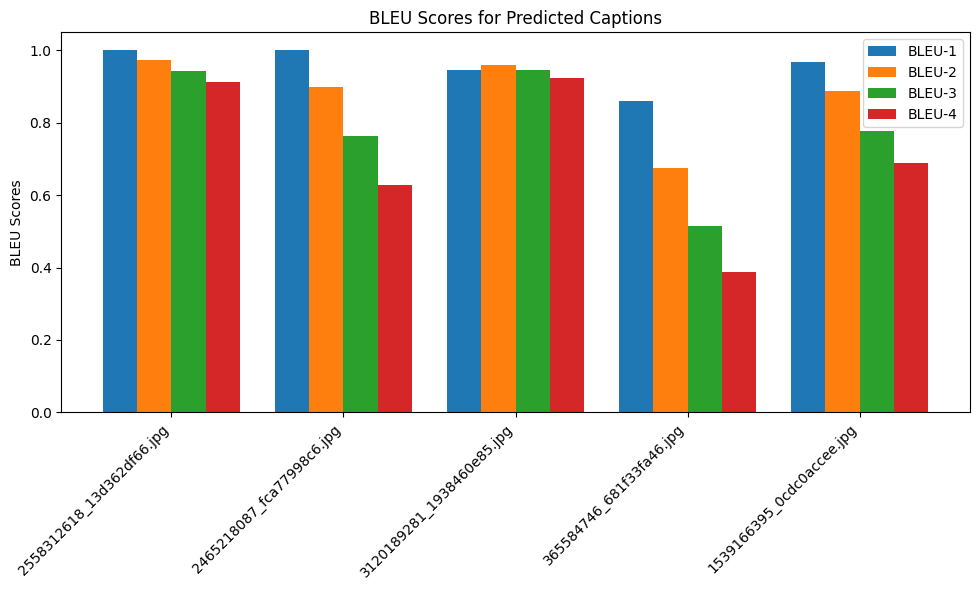

In [ ]:
def plot_bleu_scores(bleu_scores):
    image_ids = [get_image_id(score['image_path']) for score in bleu_scores]
    bleu_1 = [score['BLEU-1'] for score in bleu_scores]
    bleu_2 = [score['BLEU-2'] for score in bleu_scores]
    bleu_3 = [score['BLEU-3'] for score in bleu_scores]
    bleu_4 = [score['BLEU-4'] for score in bleu_scores]

    # Plotting the BLEU scores
    x = range(len(image_ids))
    width = 0.2

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, bleu_1, width, label='BLEU-1')
    ax.bar([p + width for p in x], bleu_2, width, label='BLEU-2')
    ax.bar([p + 2 * width for p in x], bleu_3, width, label='BLEU-3')
    ax.bar([p + 3 * width for p in x], bleu_4, width, label='BLEU-4')

    ax.set_ylabel('BLEU Scores')
    ax.set_title('BLEU Scores for Predicted Captions')
    ax.set_xticks([p + 1.5 * width for p in x])  # Adjust x-axis ticks
    ax.set_xticklabels(image_ids, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example: Plot BLEU scores for the random images
plot_bleu_scores(bleu_scores)


In [ ]:
pip install pyttsx3

Note: you may need to restart the kernel to use updated packages.Collecting pyttsx3



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


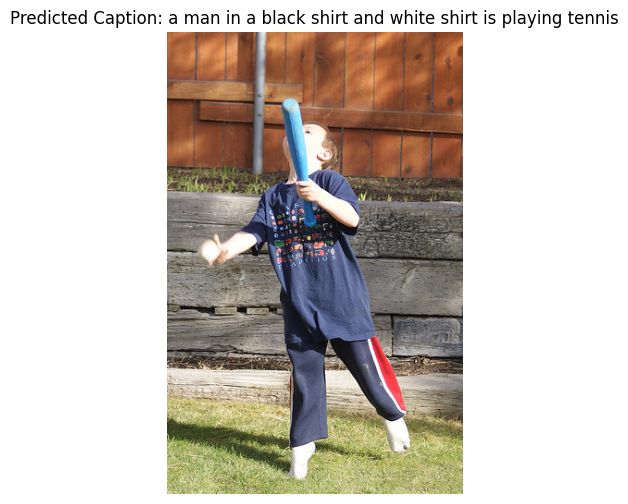

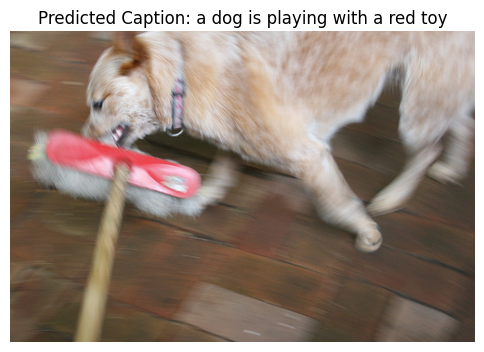

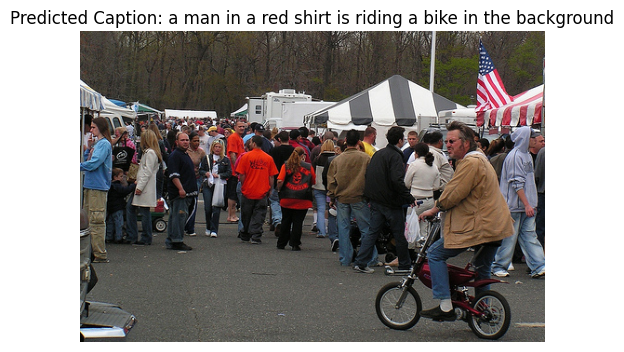

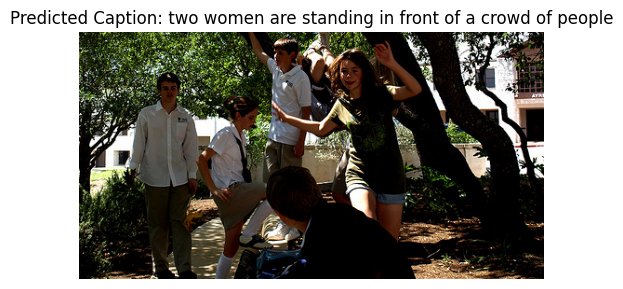

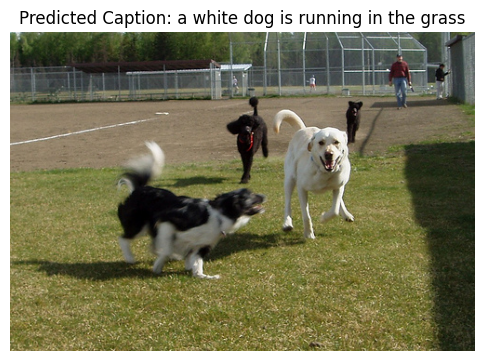

In [ ]:
import pickle
import random
import pyttsx3
import os
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# Load the generated captions from the saved pickle file
def load_captions_from_file(filename):
    with open(filename, 'rb') as f:
        captions_dict = pickle.load(f)
    return captions_dict

# Example: Load the file
predicted_captions = load_captions_from_file('test_data_predictions.pkl')  # Adjust path
test_dict = load_captions_from_file('test_data.pkl')  # Adjust path

# Normalize paths by replacing '\\' with '/'
predicted_captions_normalized = {key.replace("\\", "/"): value for key, value in predicted_captions.items()}
test_data_normalized = {key.replace("\\", "/"): value for key, value in test_dict.items()}

# Initialize the TTS engine
engine = pyttsx3.init()

def generate_audio_for_random_images(test_data, predicted_captions_normalized, num_images=5):
    random_images = random.sample(list(test_data.items()), num_images)

    i = 0
    # Iterate over random images
    for image_path, actual_captions in random_images:
        # Get predicted caption for the current image (from normalized dictionary)
        predicted_caption = predicted_captions_normalized.get(image_path, None)

        i = i + 1
        if predicted_caption:
            # Preprocess the caption
            caption_cleaned = predicted_caption.replace("<start> ", "").replace(" <end>", "")

            # Generate audio from the caption and save it to a file
            audio_file = f"{i}.mp3"
            os.makedirs("audio", exist_ok=True)  # Ensure the directory exists
            engine.save_to_file(caption_cleaned, audio_file)  # Save audio to file
            engine.runAndWait()  # Wait for the audio to be generated

            # Display image and audio
            try:
                img = Image.open(image_path)
                plt.figure(figsize=(6, 6))
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"Predicted Caption: {caption_cleaned}")
                plt.show()

                # Display the audio file next to the image
                display(Audio(audio_file, autoplay=False))
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

# Example usage: Generate audio and display for 5 random images
generate_audio_for_random_images(test_data_normalized, predicted_captions_normalized, num_images=5)
